# Plotting with matplotlib

This is a very quick introduction.  It is provided here because plotting is fun, satisfying, and illuminating, and you probably need a break after the rather dry introduction to the numpy ndarray. Please refer to the matplotlib documentation (http://matplotlib.org/contents.html) for more information, and to the gallery (http://matplotlib.org/gallery.html) for more examples.  For oceanographic examples, see the tutorials in http://currents.soest.hawaii.edu/ocn620/exercises.html.

First, we need to decide whether we want the plots to appear as static objects below the code blocks (`inline` option), or as fully interactive plots in independent windows.  Typically the latter is best during development and exploration, and the former is used when the notebook has reached the stage of being a document.  The `inline` option is required for making static renderings such as the static html page.

In [1]:
%matplotlib inline
#%matplotlib

Next, the standard imports:

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Minimal exploratory plotting

Suppose you have a time series of a variable, perhaps sea surface height, and you want to take a quick first look at it.  For this example we will generate a fake data set so we don't have to bother downloading a real data set.

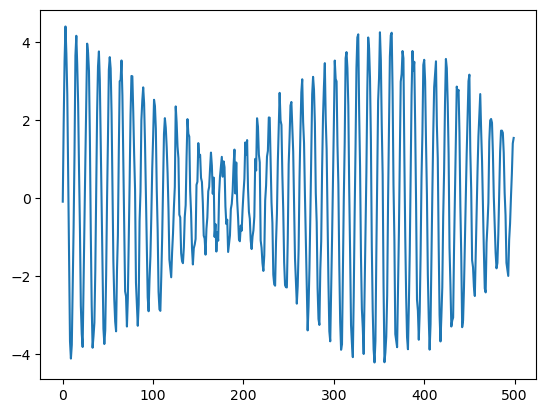

In [3]:
# time in hours
t = np.arange(500)
h = 2.5 * np.sin(2 * np.pi * t / 12.42)
h += 1.5 * np.sin(2 * np.pi * t / 12.0)
h += 0.3 * np.random.randn(len(t))
plt.plot(t, h)

That was easy.  If you are using the independent windows, now is a good time to experiment with the navigation toolbar.  You might try modifying the code block to span a much greater length of time, then zoom in to a short interval, and pan to slide that interval along.

## A plot you might show to someone

Now let's make a plot that is intended for more than temporary exploration, so it will have a title, axis labels, and a legend.  We will generate a fake data set with zonal and meridional velocity components.

Text(0.5, 1.0, 'Demo with a fake semidiurnal tidal velocity record')

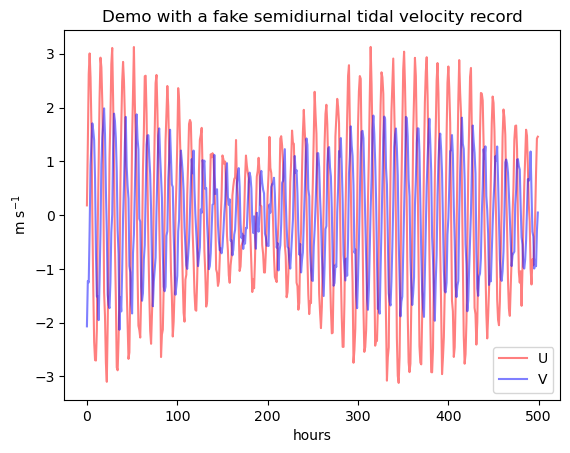

In [4]:
def fake_tide(t, M2amp, M2phase, S2amp, S2phase, randamp):
    """
    Generate a minimally realistic-looking fake semidiurnal tide.
    
    t is time in hours
    phases are in radians
    """
    out = M2amp * np.sin(2 * np.pi * t / 12.42 - M2phase)
    out += S2amp * np.sin(2 * np.pi * t / 12.0 - S2phase)
    out += randamp * np.random.randn(len(t))
    return out
    
t = np.arange(500)
u = fake_tide(t, 2, 0, 1, 0, 0.2)
v = fake_tide(t, 1.2, np.pi / 2, 0.6, np.pi / 2, 0.2)

plt.plot(t, u, label='U', color='Red', alpha=0.5)
plt.plot(t, v, label='V', color='Blue', alpha=0.5)
plt.legend(loc='lower right')
plt.xlabel('hours')
plt.ylabel('m s$^{-1}$')
plt.title('Demo with a fake semidiurnal tidal velocity record')

Now let's use two subplots with shared axes--that is, locked together--to look at two fake datasets.  At the same time, we will switch to a more object-oriented style, which becomes increasing desirable as plot complexity increases. In this style we make very little use of pyplot.  Instead, we create plot objects and operate on them by calling their methods.

Text(0.5, 0.98, 'Demo with a fake semidiurnal tidal velocity record')

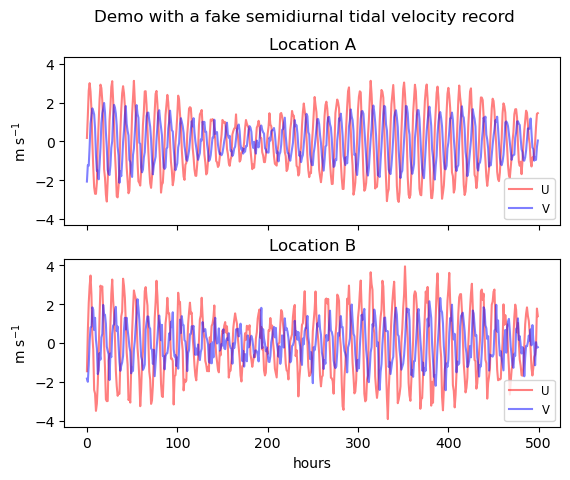

In [5]:
u1 = fake_tide(t, 2.2, 0.3, 1, .3, 0.4)
v1 = fake_tide(t, 1.1, 0.3 + np.pi / 2, 0.6, 0.3 + np.pi / 2, 0.4)

legendkw = dict(loc='lower right',
                fancybox=True,
                fontsize='small')

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, sharey=True)

ax0.plot(t, u, label='U', color='Red', alpha=0.5)
ax0.plot(t, v, label='V', color='Blue', alpha=0.5)
ax0.legend(**legendkw)

ax1.plot(t, u1, label='U', color='Red', alpha=0.5)
ax1.plot(t, v1, label='V', color='Blue', alpha=0.5)
ax1.legend(**legendkw)

# keep the y tick labels from getting too crowded
ax1.locator_params(axis='y', nbins=5)

ax1.set_xlabel('hours')
ax0.set_ylabel('m s$^{-1}$')
ax1.set_ylabel('m s$^{-1}$')

ax0.set_title('Location A')
ax1.set_title('Location B')
fig.suptitle('Demo with a fake semidiurnal tidal velocity record')

With the plot above in its own window, so that you have the navigation tools, try panning and zooming, or selecting a rectangle.  You will see that the region selection is applied to both axes.